# CMF Rateslib Project

## 3 Sub-Projects:
    - Rates Models
    - FI Products
    - Curve Building
  


### Conventions
 - 1 year == 1.0
 - 1 month == 1/12
 - 1 day == 1/252
 - 0.02 == 2%

In [1]:
cmf_rateslib_root = '../../'
import sys
if cmf_rateslib_root not in sys.path:
    sys.path.append(cmf_rateslib_root)

# Curves

In [2]:
from cmf_rateslib.curves.base_curve import BaseZeroCurve
from cmf_rateslib.curves.zero_curve import ZeroCurve

In [3]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Interpolation

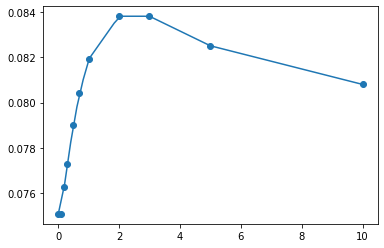

In [4]:
#R stands for zero rate, Q- for quadratic interpolation, L- for limear interpolation
# example data: as spot rate -  moex g-curve  from https://www.moex.com/ru/marketdata/indices/state/g-curve/
tenor_list=[0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 3, 5, 10]
rates_list=[0.0751, 0.0763, 0.0773, 0.079, 0.0804, 0.0819, 0.0838, 0.0838, 0.0825, 0.0808]
curve = ZeroCurve(tenor_list,rates_list,interp_method='L-R')
curve.plot()

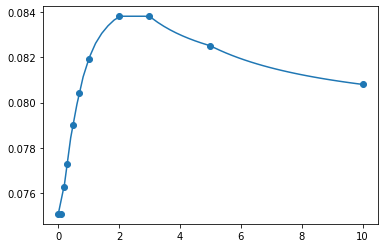

In [5]:
#LDF stands for Log Discount Factors
# example data: as spot rate -  moex g-curve  from https://www.moex.com/ru/marketdata/indices/state/g-curve/
curve = ZeroCurve(tenor_list,rates_list,interp_method='L-LDF')
curve.plot()

[array([ 0,  2,  5, 10]), array([0.01, 0.02, 0.03, 0.03])] linear


## Rolldown

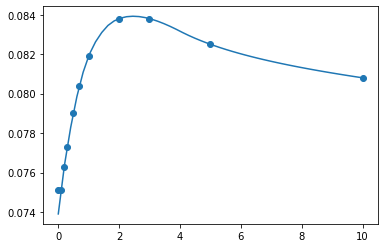

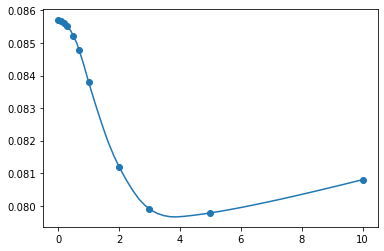

In [17]:
curve = ZeroCurve(tenor_list,rates_list,interp_method='Q-LDF')
curve2=curve.roll(1)
curve.plot()
curve2.plot()

In [ ]:
# Bumping, Spreads and other stuff

In [17]:
curve.df(0.25)

0.9809831459926365

In [16]:
curve.zero_rate(0.25)

0.07680000000000001

In [7]:
-curve.fwd_rate(0, 0.25)

0.07680000000000009

In [8]:
curve.bump(0.2)

In [19]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


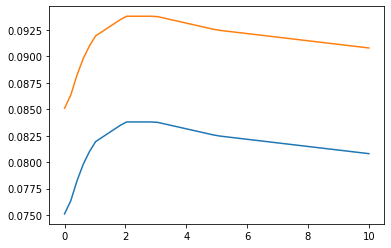

In [9]:
t = np.linspace(0, 10)
plot(t, curve.zero_rate(t), t, curve.bump(0.01).zero_rate(t))

In [13]:
curve_rus_gov=BaseZeroCurve([1, 2, 3.5, 6.5], [0.0809, 0.0865,0.0863, 0.0846])
curve_rus_corp=BaseZeroCurve([0.5, 2, 3.5, 4], [0.0882, 0.0965,0.0956,0.0956])
spread_curve = curve_rus_corp-curve_rus_gov

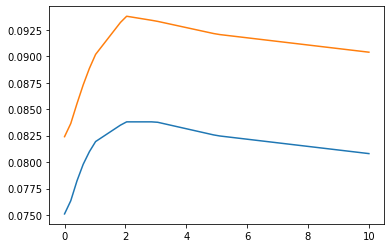

In [14]:
t = np.linspace(0, 10)
new_curve = curve + spread_curve
plot(t, curve.zero_rate(t), t, new_curve.zero_rate(t))

# Products

In [ ]:
from cmf_rateslib.products.base_product import BaseProduct

In [ ]:
p = BaseProduct()

In [ ]:
p.get_cashflows()

In [ ]:
p.pv()

In [ ]:
from cmf_rateslib.products.bonds import ZCBond

In [ ]:
bond = ZCBond(expiry=9)

In [ ]:
bond.get_cashflows()

In [ ]:
bond.pv(0, curve + spread_curve)

# Rates Models